In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# train, test , submission불러오기

train = pd.read_csv("C:/Users/parkk/ais7/credit2/train.csv", index_col=0)
test = pd.read_csv("C:/Users/parkk/ais7/credit2/test.csv", index_col=0)
submission = pd.read_csv("C:/Users/parkk/ais7/credit2/sample_submission.csv")

train.shape, test.shape

((26457, 19), (10000, 18))

In [3]:
# train 컬럼 확인하기

train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [4]:
# train 내용 확인하기

train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
# test 컬럼 확인하기

test.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month'],
      dtype='object')

In [6]:
# test 컬럼 내용 확인하기

test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
# 필요없는 컬럼 삭제해주기

train = train.drop(columns='FLAG_MOBIL', axis=1)
test = test.drop(columns='FLAG_MOBIL', axis=1)

In [8]:
# train과 test 컬럼 비교해서 test에 없는 컬럼 확인하기

set(train.columns) - set(test.columns)

{'credit'}

In [9]:
# train null값 확인하기 - occyp_type에 null값이 있는 것 확인

train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [10]:
# test null값 확인하기 - occyp_type에 null값이 있는 것 확인

test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [11]:
# train NaN 값을 N (기타라는 의미)로 변경해주기

train['occyp_type'] = train['occyp_type'].fillna('N')

In [12]:
# test NaN 값을 N (기타라는 의미)로 변경해주기

test['occyp_type'] = test['occyp_type'].fillna('N')

In [13]:
# train occyp_type 컬럼 확인해보기 - null은 무직이나 무응답으로 확인

train['occyp_type'].unique()

array(['N', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [14]:
# test occyp_type 컬럼 확인해보기 - null은 무직이나 무응답으로 확인

test['occyp_type'].unique()

array(['N', 'Core staff', 'Laborers', 'Drivers', 'Managers',
       'Sales staff', 'Cleaning staff', 'Accountants', 'Cooking staff',
       'Medicine staff', 'Realty agents', 'Waiters/barmen staff',
       'Private service staff', 'High skill tech staff',
       'Low-skill Laborers', 'Security staff', 'Secretaries', 'HR staff',
       'IT staff'], dtype=object)

In [15]:
# 필요없는 컬럼제거 후 train에 재할당하기

train = train[['gender', 'car', 'child_num','income_total', 'income_type',
       'edu_type', 'family_type', 'house_type',
       'phone', 'occyp_type', 'family_size',
       'credit']]

In [16]:
# 필요없는 컬럼제거 후 test에 재할당하기

test = test[['gender', 'car', 'child_num','income_total', 'income_type',
       'edu_type', 'family_type', 'house_type',
       'phone', 'occyp_type', 'family_size',
       ]]

In [17]:
# train과 test의 income_total의 값이 너무 커서 일괄적으로 1000나눠서 재할당해주기

train['income_total'] = train['income_total'] / 1000
test['income_total'] = test['income_total'] / 1000

In [18]:
# object인 column만 cols에 저장

cols = train.select_dtypes(include="O").columns

from sklearn import preprocessing

# object column을 하나씩 불러와서 encoding 해주기

for col in cols:
    
  # label encoder 

  le = preprocessing.LabelEncoder()
    
  # train에 fit_transform해주기 

  train[col] = le.fit_transform(train[[col]])
  test[col] = le.transform(test[[col]])

C:\Users\parkk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parkk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parkk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parkk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [19]:
# object인 column만 cols에 저장

cols = test.select_dtypes(include="O").columns

from sklearn import preprocessing

# object column을 하나씩 불러와서 encoding 해주기

for col in cols:
    
  # label encoder 

  le = preprocessing.LabelEncoder()
    
  # test에 fit_transform해주기 

  test[col] = le.fit_transform(test[[col]])

In [20]:
label_name = 'credit'
label_name

'credit'

In [21]:
# X에 train 컬럼 credit을 제거해주고, y에 credit을 할당해주기

X = train.drop(columns='credit', axis=1)
y = train[label_name]

In [22]:
# train_test_split을 이용하여 X_train, X_val, y_train, y_val 할당해주기

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19842, 11), (6615, 11), (19842,), (6615,))

In [23]:
# StandardScaler를 사용하여 스케일링해주기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
test_scaled = scaler.fit_transform(test)

In [24]:
# tensorflow 라이브러리 불러오기

import tensorflow as tf

In [25]:
# input_shape 값을 구해주기. feature수로 만들어 줌.

input_shape = X_train_scaled.shape[1]
input_shape

11

In [26]:
# model 레이어 설정하기

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [27]:
# model compile 하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# model 요약해보기

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 18,435
Trainable params: 18,435
Non-trainable params: 0
_________________________________________________________________


In [54]:
# early_stop 설정하기

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, mode='min')

In [55]:
# model fit 해주기

history = model.fit(X_train_scaled, y_train, epochs=35, validation_split=0.2, callbacks=[early_stop], verbose=0)
history

In [56]:
# history를 데이터프레임으로 만들어주기

df_hist = pd.DataFrame(history.history)
df_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.881391,0.640459,0.876367,0.644999
1,0.880762,0.640396,0.874979,0.644999
2,0.880570,0.640585,0.876690,0.644747
3,0.881411,0.640333,0.875660,0.644747
4,0.881318,0.640396,0.874268,0.644999


<AxesSubplot:>

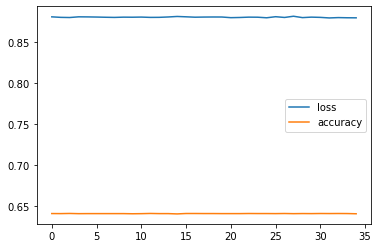

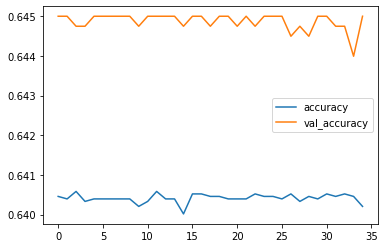

In [57]:
# 학습결과를 시각화시켜주기

df_hist[["loss", "accuracy"]].plot()
df_hist[['accuracy','val_accuracy']].plot()

In [58]:
# test_scaled 컬럼을 predict하고 y_pred에 할당하기

y_pred = model.predict(test_scaled)
y_pred

313/313 [==============================] - 0s 611us/step


array([[0.12040466, 0.18937503, 0.69022036],
       [0.1646465 , 0.2626749 , 0.57267857],
       [0.12998892, 0.287066  , 0.58294505],
       ...,
       [0.12184119, 0.2023606 , 0.6757982 ],
       [0.13124481, 0.20243984, 0.6663153 ],
       [0.1322742 , 0.23298715, 0.6347386 ]], dtype=float32)

In [59]:
# y_pred을 dataframe으로 변환해주기

y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1,2
0,0.120405,0.189375,0.690220
1,0.164647,0.262675,0.572679
2,0.129989,0.287066,0.582945
3,0.134662,0.178712,0.686625
4,0.140206,0.214543,0.645251
...,...,...,...
9995,0.153055,0.280263,0.566682
9996,0.129872,0.227596,0.642532
9997,0.121841,0.202361,0.675798
9998,0.131245,0.202440,0.666315


In [60]:
# Rangeindex를 submission과 동일하게 0,1,2로 할당해주기

y_pred_df.columns = ['0','1','2']

In [61]:
submission.drop(columns='index')

,0,1,2
0,0.139472,0.200510,0.660017
1,0.162918,0.246530,0.590552
2,0.134534,0.295559,0.569907
3,0.135486,0.204858,0.659655
4,0.126425,0.237917,0.635658
...,...,...,...
9995,0.145932,0.253185,0.600883
9996,0.154859,0.219839,0.625302
9997,0.132094,0.233152,0.634754
9998,0.117490,0.231879,0.650631


In [62]:
# y_pred_df의 값을 submission에 할당하기

submission['0'] = y_pred_df['0']
submission['1'] = y_pred_df['1']
submission['2'] = y_pred_df['2']

In [63]:
# submission 컬럼 확인하기

submission

,index,0,1,2
0,26457,0.120405,0.189375,0.690220
1,26458,0.164647,0.262675,0.572679
2,26459,0.129989,0.287066,0.582945
3,26460,0.134662,0.178712,0.686625
4,26461,0.140206,0.214543,0.645251
...,...,...,...,...
9995,36452,0.153055,0.280263,0.566682
9996,36453,0.129872,0.227596,0.642532
9997,36454,0.121841,0.202361,0.675798
9998,36455,0.131245,0.202440,0.666315


In [64]:
# submission 파일 저장하기

submission.to_csv('C:/Users/parkk/ais7/credit2/submission.csv', index=False)

In [65]:
# read_csv로 저장이 되어있는지 확인하기

pd.read_csv('C:/Users/parkk/ais7/credit2/submission.csv')

,index,0,1,2
0,26457,0.120405,0.189375,0.690220
1,26458,0.164647,0.262675,0.572679
2,26459,0.129989,0.287066,0.582945
3,26460,0.134662,0.178712,0.686625
4,26461,0.140206,0.214543,0.645251
...,...,...,...,...
9995,36452,0.153055,0.280263,0.566682
9996,36453,0.129872,0.227596,0.642532
9997,36454,0.121841,0.202361,0.675798
9998,36455,0.131245,0.202440,0.666315
